Variable vertical diffusivity - Run01
===================================================

/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01
--------------------------------------------------------------



In [7]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

In [8]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

In [9]:
filename='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/stateGlob.nc'
StateOut = Dataset(filename)

#for dimobj in StateOut.variables.values():
#    print dimobj


filename2='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/gridGlob.nc'
GridOut = Dataset(filename2)

#for dimobj in GridOut.variables.values():
#    print dimobj


filename3='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/ptracersGlob.nc'
PtracersOut = Dataset(filename3)

#for dimobj in PtracersOut.variables.values():
#    print dimobj


In [10]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOut.variables['Z']
print(z[10])
Time = StateOut.variables['T']
print(Time[:])

xc = rout.getField(filename2, 'XC') # x coords tracer cells

yc = rout.getField(filename2, 'YC') # y coords tracer cells

bathy = rout.getField(filename2, 'Depth')

MaskC = rout.getMask(filename2,'HFacC')

-52.5
[      0.   43200.   86400.  129600.  172800.  216000.  259200.  302400.
  345600.  388800.  432000.  475200.  518400.  561600.  604800.  648000.
  691200.  734400.  777600.]


In [11]:
zlev = 15             # level 34 corresponds to  162.5m , near shelf break

timesc = np.arange(0,len(Time),2)   # These correspond to each day


In [12]:
Temp = rout.getField(filename, 'Temp')

temp0 = np.ma.masked_values(Temp, 0)






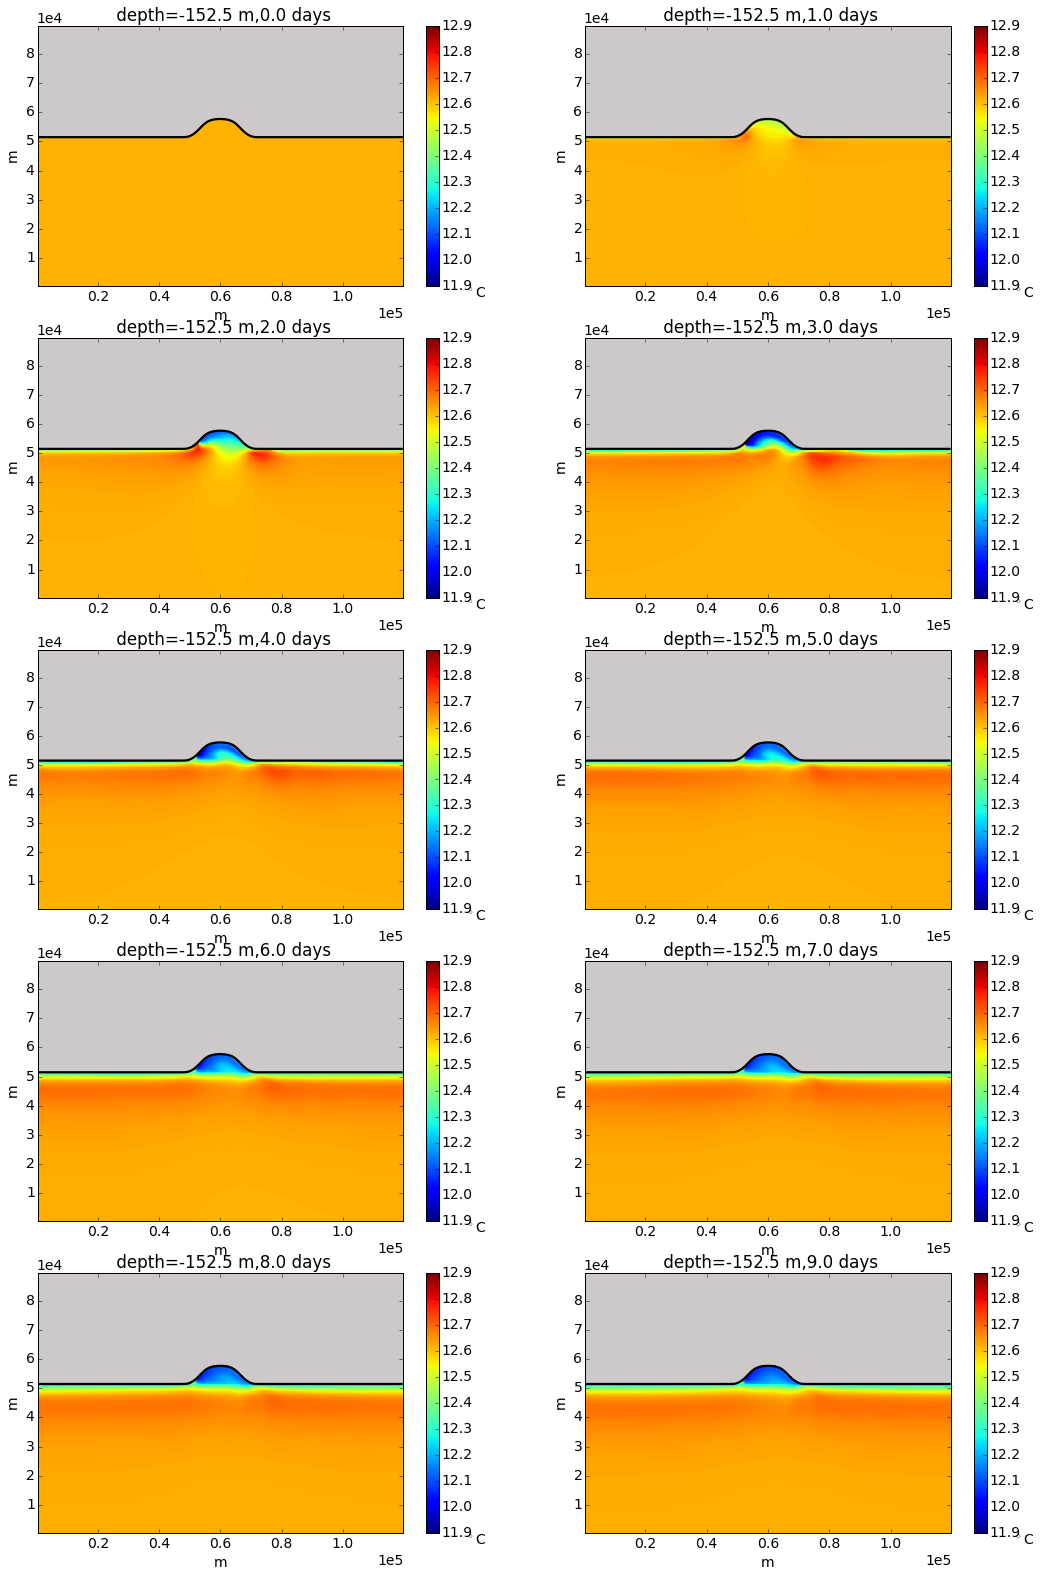

In [13]:
####  PLOT ####
zlev=30
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,27))

for tt in range(0,19,2) :
        ### Temperature run01
        plt.subplot(5,2,kk)
        
        ax = plt.gca()
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        TempMask=np.ma.array(Temp[tt,zlev,:,:],mask=MaskC[zlev,:,:])
        
        plt.pcolor(xc,yc,TempMask)
        pl.clim([11.9,12.9])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
        kk=kk+1
        

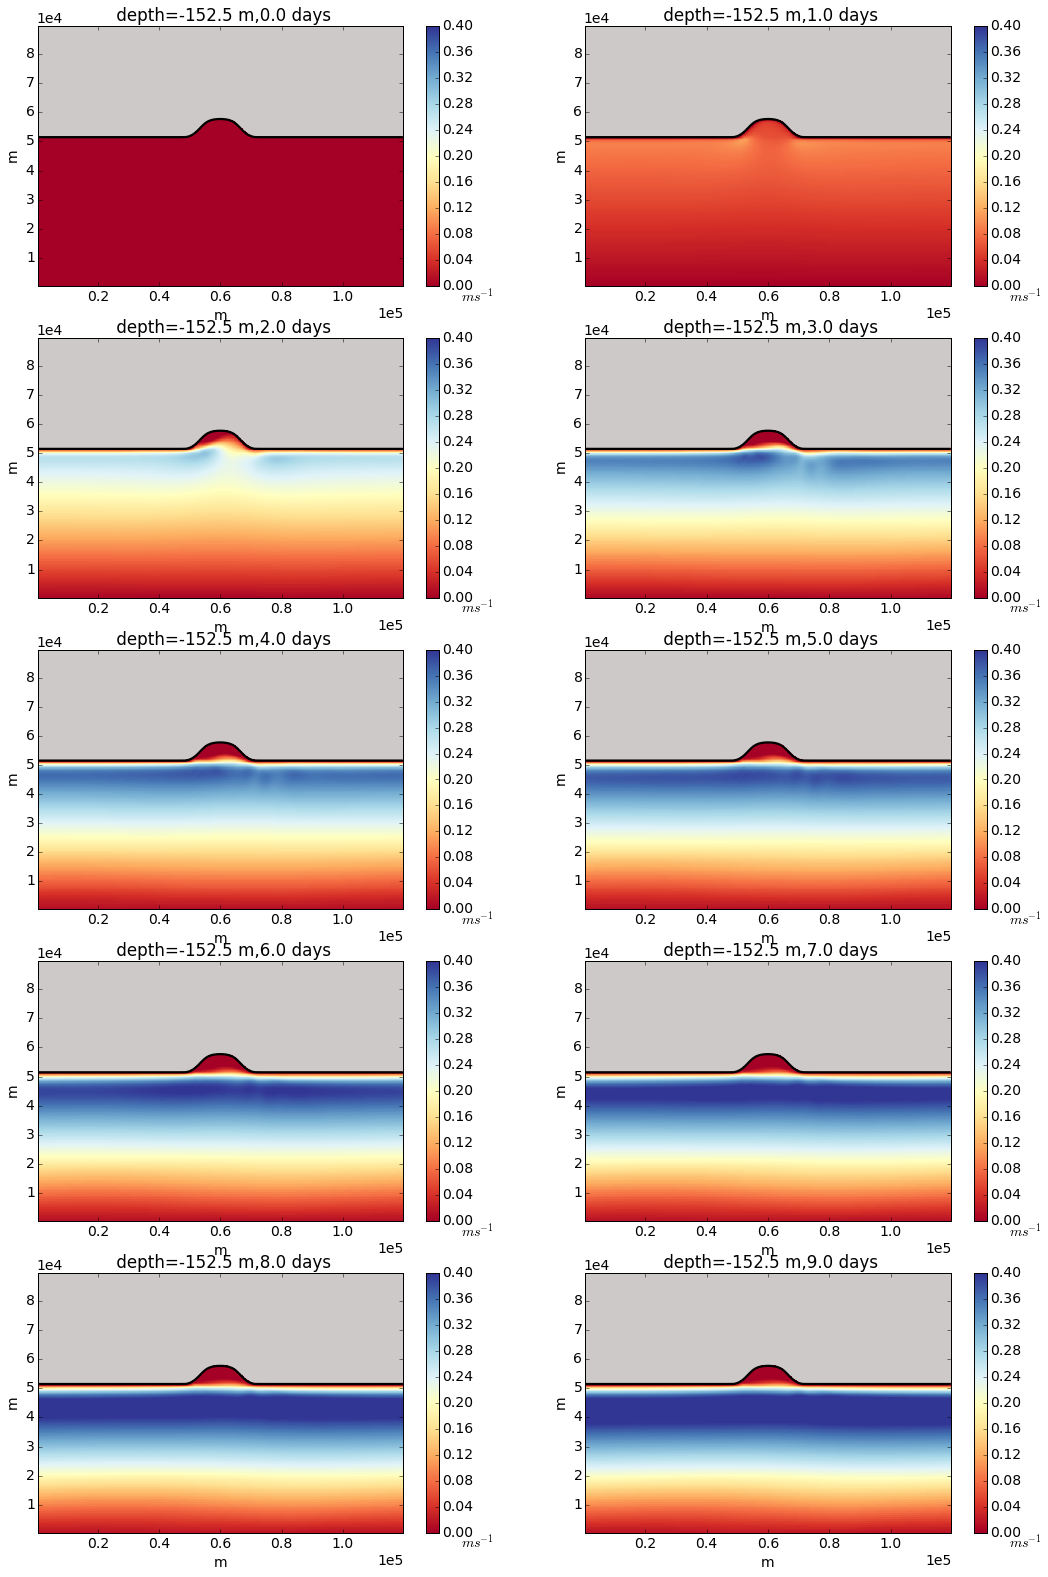

In [14]:
U = rout.getField(filename, 'U')
V = rout.getField(filename, 'V')

u,v = rout.unstagger(U,V)


####  PLOT ####
zlev=30
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,27))

for tt in range(0,19,2) :
        
        ### Temperature run01
        plt.subplot(5,2,kk)
        
        ax = plt.gca()
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        UMask=np.ma.array(u[tt,zlev,:,:],mask=MaskC[zlev,:-1,:])
        plt.pcolor(xc,yc,UMask,cmap='RdYlBu')
        pl.clim([0,0.4])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$ms^{-1}$',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
        kk=kk+1
        

52100.0


/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


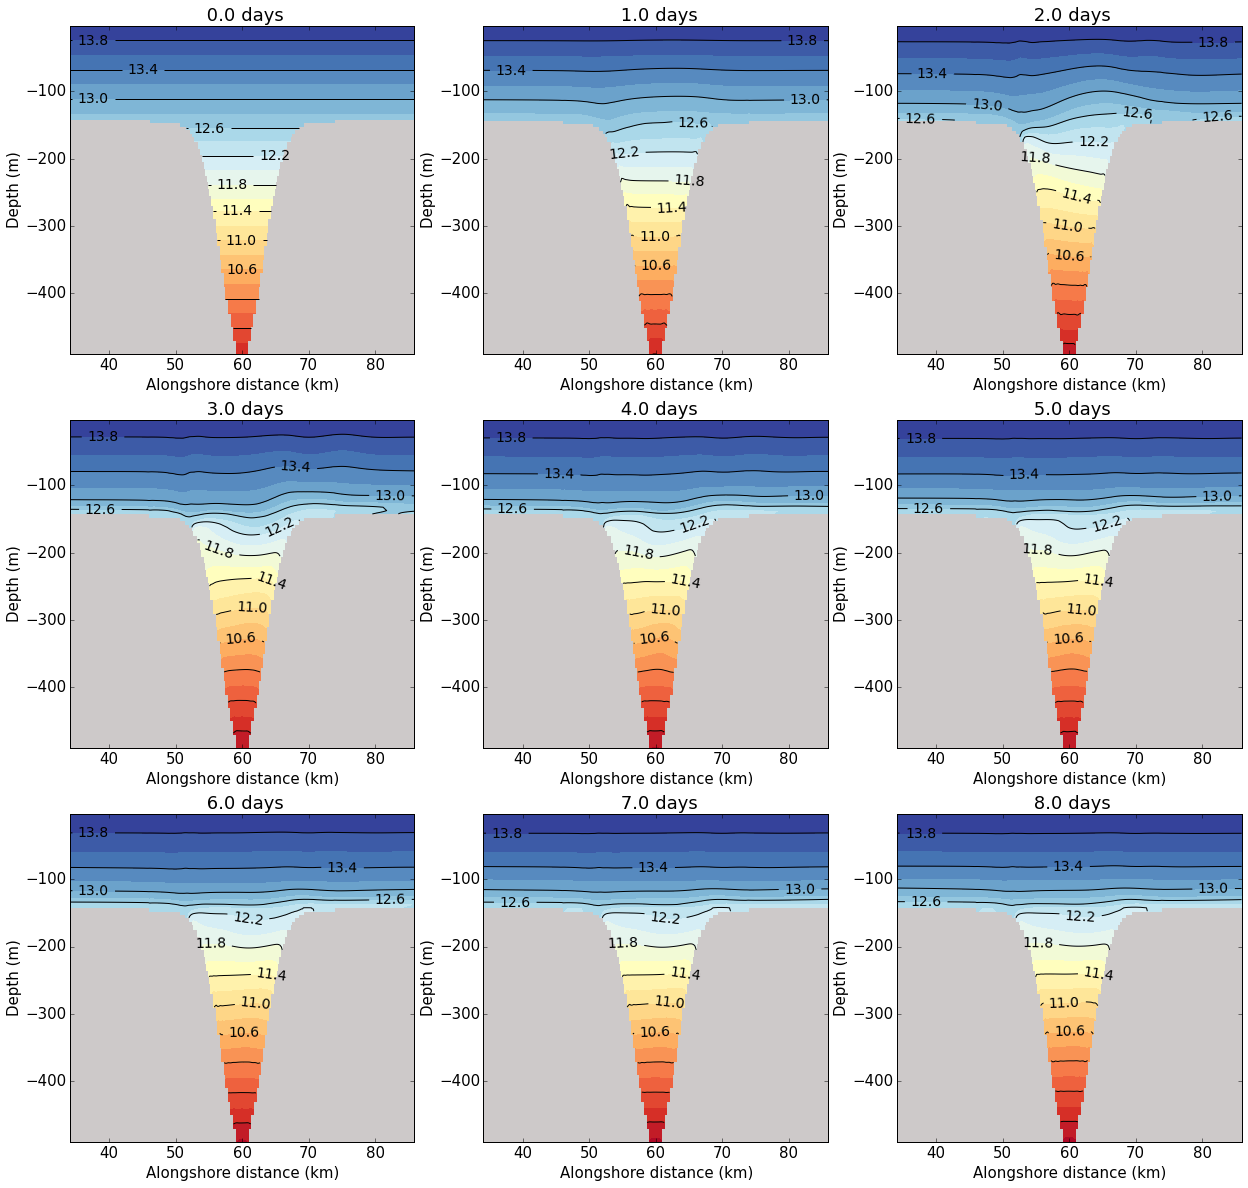

In [15]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TempMask=np.ma.array(Temp[tt,:,:,:],mask=MaskC[:,:,:])
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        levels=np.arange(9,14.4,0.2)
        CS=plt.contourf(xc[200,50:-50],z[:-35],TempMask[:-35,200,50:-50],levels,cmap='RdYlBu')
        #cb = plt.colorbar()
        plt.clim([9, 14])
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 



52100.0


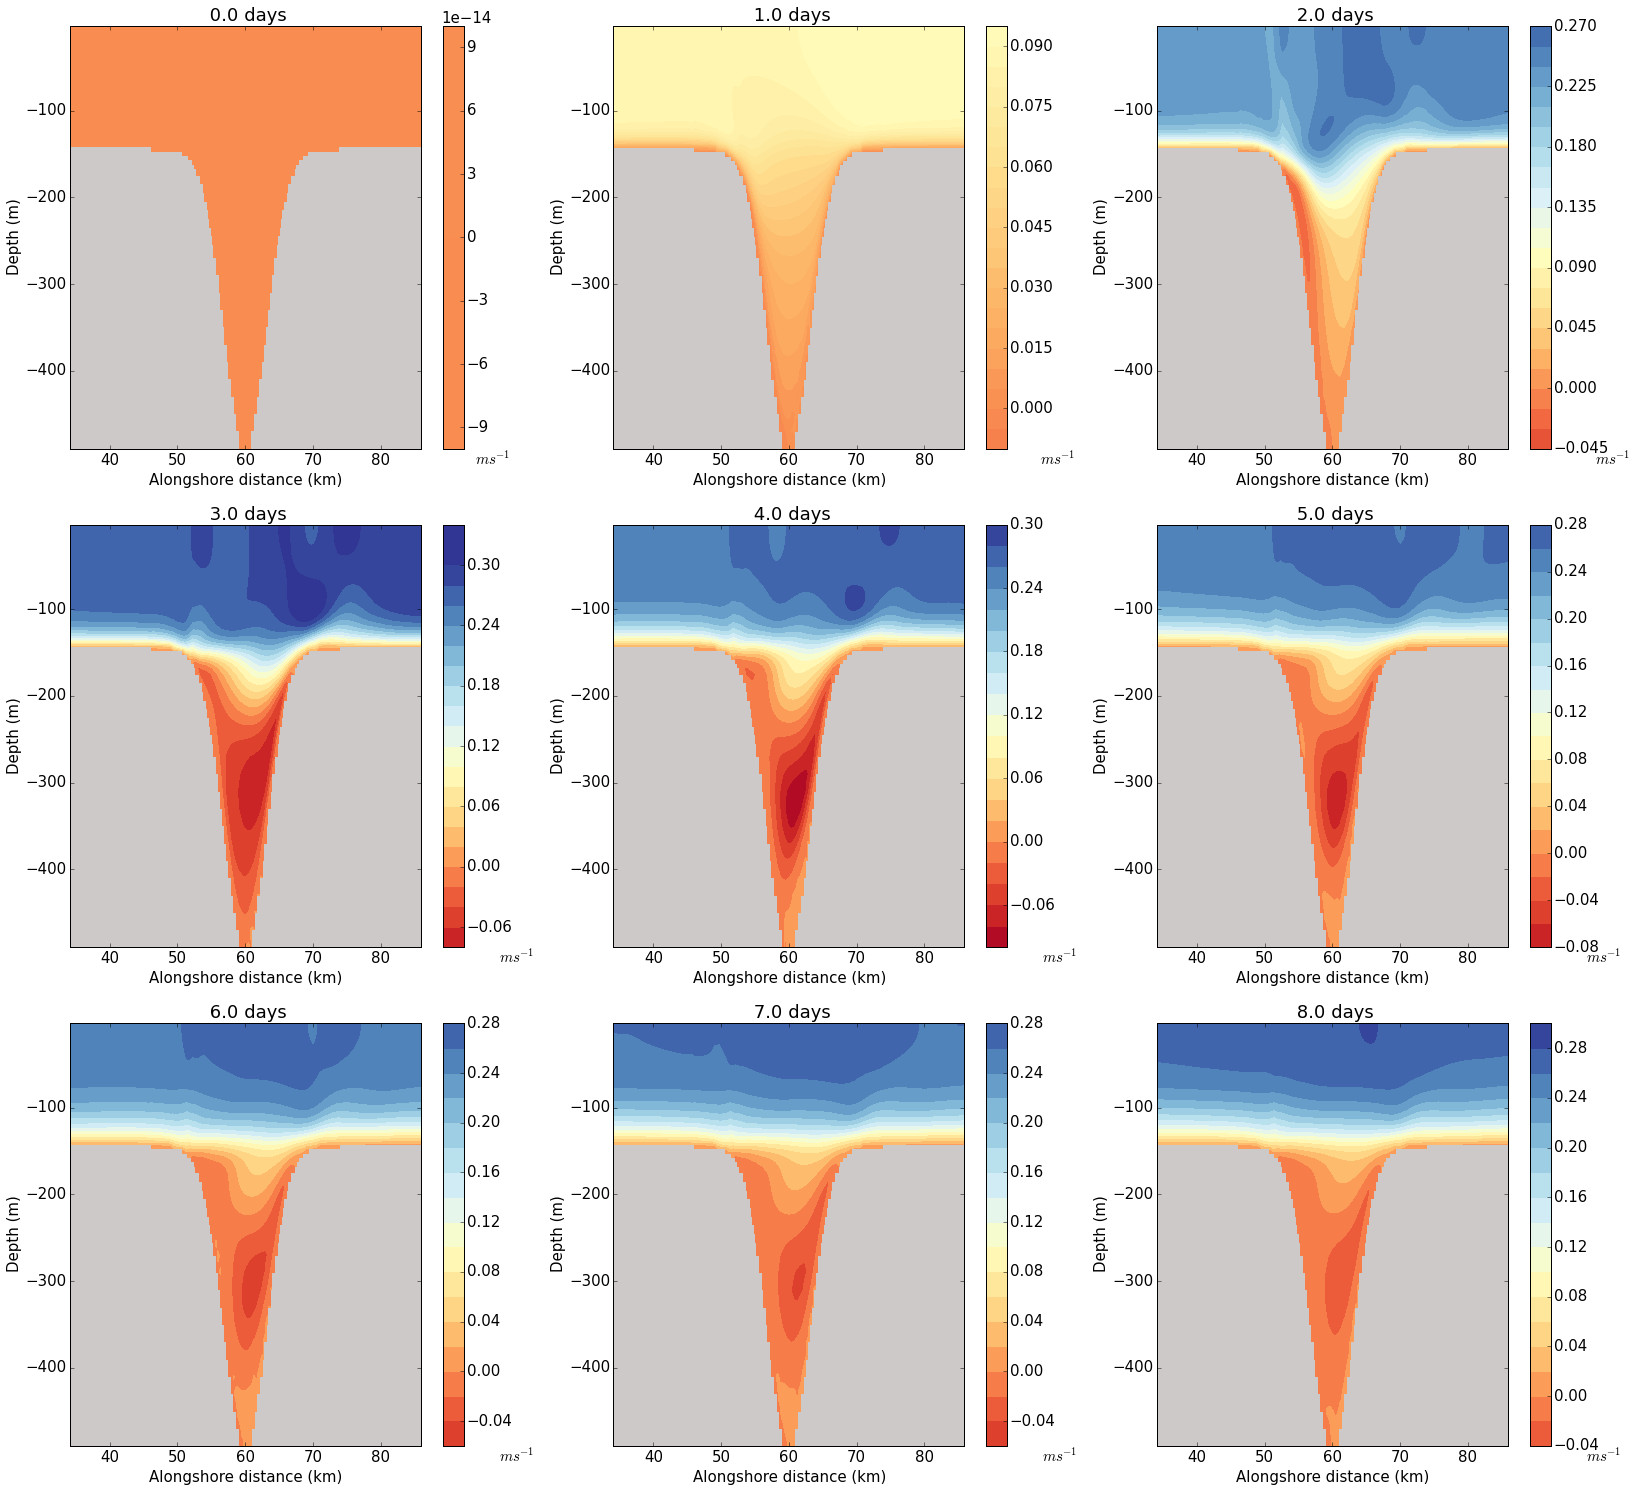

In [16]:
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(23,21))

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        UMask=np.ma.array(u[tt,:,:,:],mask=MaskC[:,:-1,:])
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        #levels=np.arange(-1,1,0.02)
        CS=plt.contourf(xc[200,50:-50],z[:-35],UMask[:-35,200,50:-50],20,cmap='RdYlBu')
        cb = plt.colorbar()
        plt.clim([-0.1,0.3])
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        #plt.clabel(CS2, fmt = '%2.1f', colors = 'k', fontsize=14)
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('$ms^{-1}$', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
        plt.tight_layout()
       
            
        kk=kk+1
print(yc[200,0]) 

